In [1]:
import numpy as np
import matplotlib.pylab as plt
import scipy, os
from scipy.stats import norm


from palettable.cmocean.sequential import Tempo_20_r# Oslo_20
palettable_cmap = Tempo_20_r #Ice_20
pal_cmap = palettable_cmap.mpl_colormap


# Cork_20

from palettable.scientific.diverging import Cork_20# Oslo_20
palettable_cmap_2 = Cork_20 #Ice_20
pal_cmap_2 = palettable_cmap.mpl_colormap

In [2]:
def lin(x,a,b):
	return a*x+b

In [3]:
import random
from operator import add, sub, mul

ops = (add, sub)
op = random.choice(ops)

print(op(1,1))

0


In [4]:
plt.rcParams.update({'lines.linewidth': 2,'lines.markersize': 12,}) #1.5 default?
plt.rcParams.update({'font.size': 14})

In [5]:
x_ax = np.linspace(0,10,20)
y = lin(x_ax,0.7,0)

# for i in range(len(x_ax)):
# 	y[i] = y[i] * np.random.uniform(0.6,1) #+ np.random.uniform(0,0.8)

for i in range(len(x_ax)):
	op = random.choice(ops)
	y[i] = op(y[i], np.random.uniform(0.1,0.4)) * np.random.uniform(0.6,1)

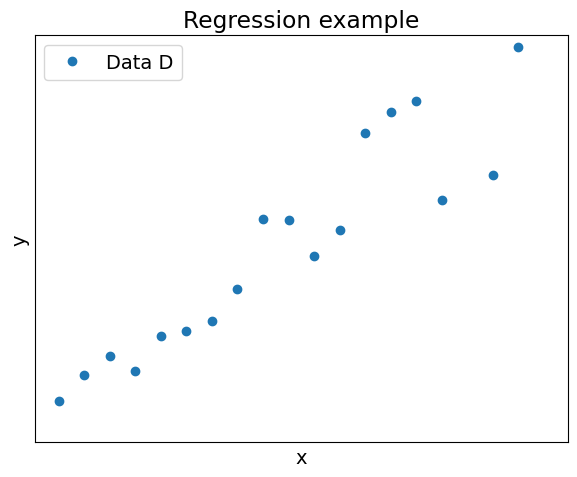

In [6]:
fig, ax = plt.subplots(figsize=(6,5))

ax.plot(x_ax,y, ls='none', marker = '.', label = 'Data D')
# ax.plot(x_ax,lin(x_ax,0.7,0)*0.8, label = 'Fit')
plt.legend()

plt.xlabel('x')
plt.ylabel('y')

plt.ylim((-0.4, 6))

plt.xticks([])
plt.yticks([])
plt.title('Regression example')
plt.tight_layout()
plt.savefig('Figures/Regression_unfitted.svg')


In [7]:
def gauss(x, mean, std_dev): #A amplitude, mu - mean, sigma - std deviation
    return 1/np.sqrt(2*np.pi) / std_dev * np.exp( - ( x-mean )**2 / ( 2*std_dev**2 ) ) # / ( np.sqrt(2) * np.pi * sigma**2 )

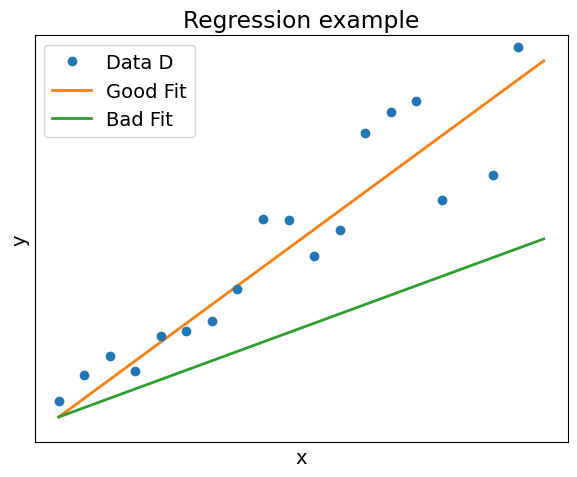

In [8]:
fig, ax = plt.subplots(figsize=(6,5))

ax.plot(x_ax,y, ls='none', marker = '.', label = 'Data D', zorder = 10)
ax.plot(x_ax,lin(x_ax,0.7,0)*0.8, label = 'Good Fit') #
ax.plot(x_ax,lin(x_ax,0.7,0)*0.4, label = 'Bad Fit') #

idx = 8
fit = lin(x_ax,0.7,0)*0.8

# ys = np.linspace(fit[idx]-1, fit[idx] +1 , 100)
# ax.plot(x_ax[idx],fit[idx], ls='none', marker = '.', label = 'Model pt', c = 'black', alpha=0.4)
# ax.axvline(x_ax[idx]-0.1, ys.min()/6, ys.max()/6*1.13 , color = 'black' , alpha=0.4)
# ax.plot(x_ax[idx] + gauss(ys, fit[idx], 0.4)*0.5, ys ,label = 'Model distro' )


plt.legend()

plt.xlabel('x')
plt.ylabel('y')

plt.ylim((-0.4, 6))

plt.xticks([])
plt.yticks([])
plt.title('Regression example')
plt.tight_layout()
plt.savefig('Figures/Regression_fitted.svg')


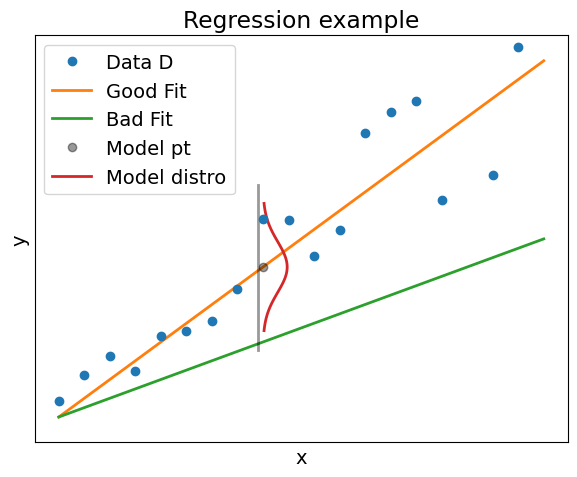

In [9]:
fig, ax = plt.subplots(figsize=(6,5))

ax.plot(x_ax,y, ls='none', marker = '.', label = 'Data D', zorder = 10)
ax.plot(x_ax,lin(x_ax,0.7,0)*0.8, label = 'Good Fit') #
ax.plot(x_ax,lin(x_ax,0.7,0)*0.4, label = 'Bad Fit') #

idx = 8
fit = lin(x_ax,0.7,0)*0.8

ys = np.linspace(fit[idx]-1, fit[idx] +1 , 100)
ax.plot(x_ax[idx],fit[idx], ls='none', marker = '.', label = 'Model pt', c = 'black', alpha=0.4)
ax.axvline(x_ax[idx]-0.1, ys.min()/6, ys.max()/6*1.13 , color = 'black' , alpha=0.4)
ax.plot(x_ax[idx] + gauss(ys, fit[idx], 0.4)*0.5, ys ,label = 'Model distro' )


plt.legend()

plt.xlabel('x')
plt.ylabel('y')

plt.ylim((-0.4, 6))

plt.xticks([])
plt.yticks([])
plt.title('Regression example')
plt.tight_layout()
plt.savefig('Figures/Regression_fitted_gauss.svg')


In [ ]:
ys.min()

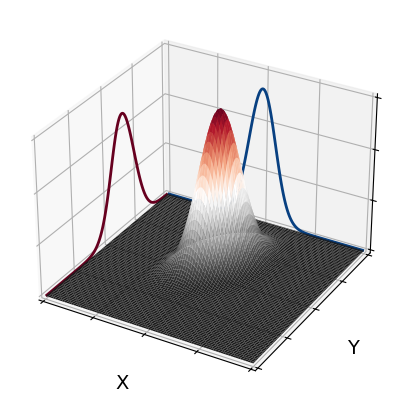

In [11]:
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import axes3d

ax = plt.figure(figsize=(6,5)).add_subplot(projection='3d')

width = 10

x = np.linspace(-width,width,700)
y = np.linspace(-width,width,700)
X, Y = np.meshgrid(x,y)

mu_x= 0
mu_y= 2
variance_x = 2
variance_y = 4

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

Z = multivariate_normal([mu_x, mu_y], [[variance_x, 1], [1, variance_y]]).pdf(pos)

# Plot the 3D surface
# ax.plot_surface(X, Y, Z, alpha=1, antialiased = 'False'), #e)  , edgecolor='royalblue' 'RdGy' , edgecolor='black' rstride=8, cstride=8, edgecolor='black', lw=0.2
ax.plot_surface(X, Y, Z,  alpha=1, cmap = 'RdGy_r', rstride=8, cstride=8, antialiased = 'True'), #e)  , edgecolor='royalblue' 'RdGy' , edgecolor='black' , lw=0.2, rstride=8, cstride=8, antialiased = 'False'

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph.
# ax.contour(X, Y, Z, zdir='z', offset=-100, cmap='coolwarm')
ax.contour(X, Y, Z, zdir='x', offset=-width, levels = [1], cmap= 'PuRd_r') #, cmap='coolwarm'
ax.contour(X, Y, Z, zdir='y', offset=width, levels = [1],cmap='GnBu_r') #cmap='coolwarm'

ax.set(xlim=(-width, width), ylim=(-width, width),
       xlabel='X', ylabel='Y', zlabel='Z')

ax.set_xlabel('X')
ax.set_ylabel('Y')
# ax.set_zlabel('Z')

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([]);
# plt.tight_layout()#
# plt.show()

plt.savefig('Figures/Marginal_Distro.svg')

In [13]:
def RBF_kernel_pairwise(x1,x2,parameters):
	theta1 = parameters[0]
	theta2 = parameters[1]
	# Pairwise kernel kreation
	return theta1 * np.exp( - (x1-x2)**2/(2*theta2**2)  )

def RBF_kernel(x1,x2,parameters):
	'''' 
		x1, x2 the 1D arrays of which the covarianc matrix is created
		parameters - 2 input parameters in an array for amplitute (here ~ 1 sigma range of prediction = theta 1, and theta 2 some scaling factor)
	'''
	theta1 = parameters[0] # ~ 1sigma
	theta2 = parameters[1] # ?
	# RBF kernel creation for all elements at once
	return theta1**2 * np.exp(- 1/(2 * theta2**2) * np.subtract.outer(x1,x2)**2) #if x1 and x2 are 1D objects the kernel will be a 2d Matrix


# def linear_kernel(x1,x2,parameters):
# 	'''' 
# 		x1, x2 the 1D arrays of which the covarianc matrix is created
# 		paramerts- 3 input parameters theta_2 ~ average distance from function mean, theta_1 = certainty around offset, theta_2 = offset
# 	'''

# 	theta_1 = parameters[0] # avg distance from theta3
# 	theta_2 = parameters[1] # ~ 1*sigma
# 	theta_3 = parameters[2] # offset

# 	# return theta_1**2 + theta_2**2 * np.multiply.outer((x1 - theta_3),(x2-theta_3))

# 	kernel_matrix = np.zeros((len(x1),len(x2) ))

# 	for i in range(len(x1)):
# 		for j in range(len(x2)):
# 			kernel_matrix[i,j] = theta_1**2 + theta_2**2 * ( (x1[i] - theta_3) * (x2[j] - theta_3))
# 	return kernel_matrix


def linear_kernel(x1,x2,parameters):
	'''' 
		x1, x2 the 1D arrays of which the covarianc matrix is created
		paramerts- 3 input parameters theta_2 ~ average distance from function mean, theta_1 = certainty around offset, theta_2 = offset
	'''

	theta_1 = parameters[0] # avg distance from theta3
	theta_2 = parameters[1] # ~ 1*sigma
	theta_3 = parameters[2] # offset

	return theta_1**2 + theta_2**2 *np.multiply.outer((x1 - theta_3),(x2-theta_3))



def periodic_kernel(x1,x2,parameters):
	'''' 
		x1, x2 the 1D arrays of which the covarianc matrix is created
		paramerts- 3 input parameters 
	'''

	pi = np.pi 

	theta_1 = parameters[0] # ~ 1*sigma
	theta_2 = parameters[1] # period 
	theta_3 = parameters[2] # lengthscale

	return theta_1**2 * np.exp( - 2 * np.sin( pi * np.abs(np.subtract.outer(x1,x2)) / theta_2  )**2 / theta_3**2 )





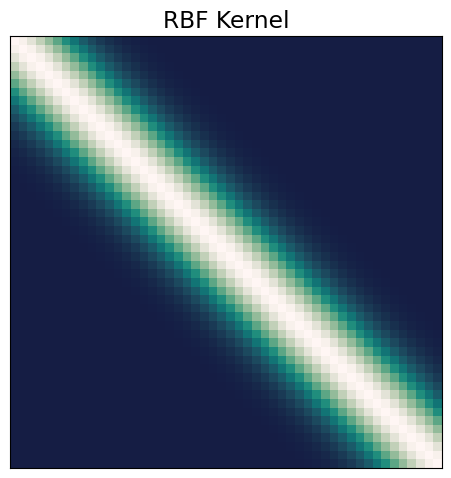

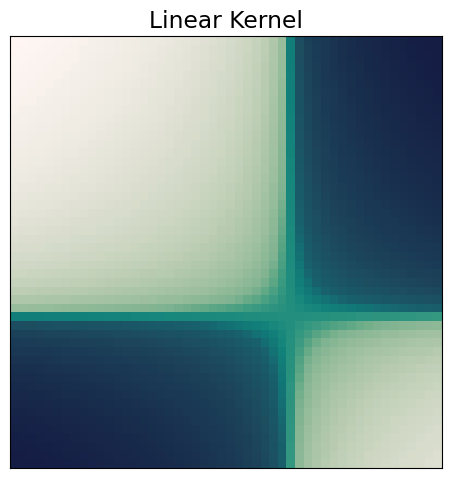

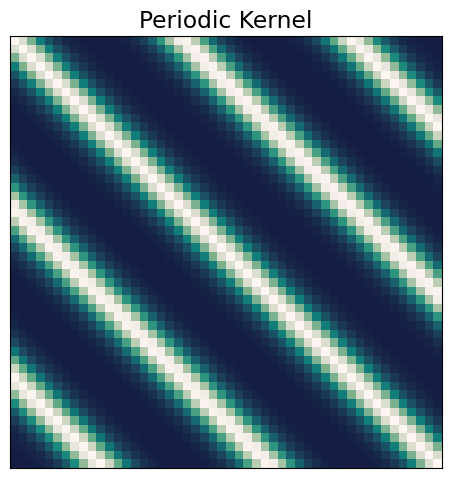

In [14]:
fig, ax = plt.subplots(figsize=(6,5))


x_axis = np.linspace(-10,10,50)

# ---------------------------------------- RBF Kernel ---------------------------------------- #

init_params = [1,2] # ~ simga | length/ width

ax.imshow(RBF_kernel(x_axis,x_axis,init_params), cmap=pal_cmap)
ax.set_title('RBF kernel cov. matrix')


plt.xticks([])
plt.yticks([])
plt.title('RBF Kernel')
plt.tight_layout()
plt.savefig('Figures/Kernel_RBF.svg')
plt.show()

# ---------------------------------------- Linear Kernel ---------------------------------------- #
fig, ax = plt.subplots(figsize=(6,5))

init_params_lin = [0,1,3]#  avg distance from offset | sigma | offset [1,0.5,3]#
cov_3 = linear_kernel(x_axis,x_axis,init_params_lin)
# print(cov_3)

ax.imshow(linear_kernel(x_axis,x_axis,init_params_lin), cmap=pal_cmap, norm='symlog')
ax.set_title('Linear kernel cov. matrix')

plt.xticks([])
plt.yticks([])
plt.title('Linear Kernel')
plt.tight_layout()
plt.savefig('Figures/Kernel_Lin.svg')
plt.show()


# -------------------------------------- Periodic Kernel ---------------------------------------- #
fig, ax = plt.subplots(figsize=(6,5))

init_params_per = [1,8,0.7] #  ~ 1sigma | period | lenghtscale
cov_3 = linear_kernel(x_axis,x_axis,init_params_per)

ax.imshow(periodic_kernel(x_axis,x_axis,init_params_per), cmap=pal_cmap)
ax.set_title('Periodic kernel cov. matrix')


plt.xticks([])
plt.yticks([])
plt.title('Periodic Kernel')
plt.tight_layout()
plt.savefig('Figures/Kernel_Per.svg')
plt.show()

### XKCD Style plots


findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

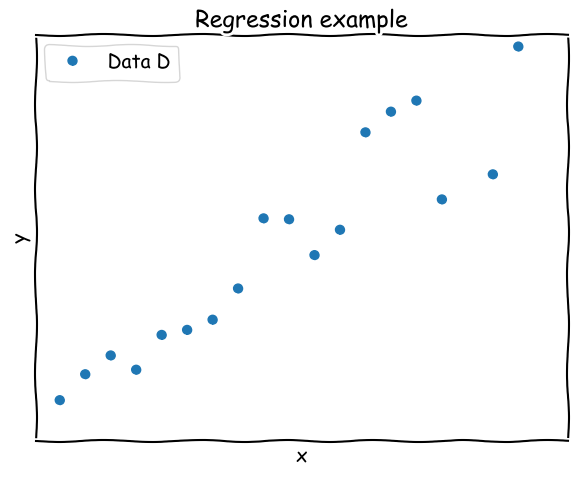

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

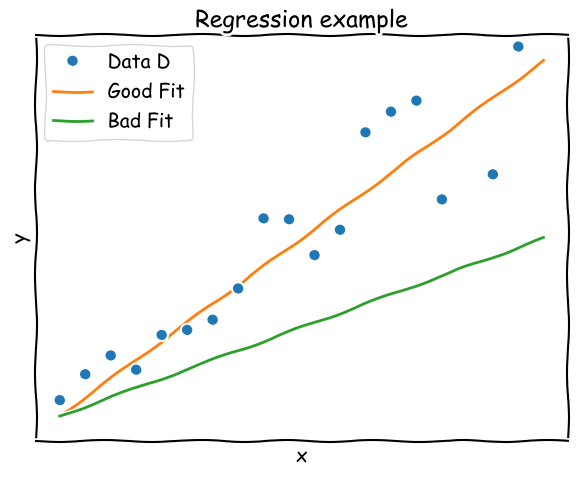

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

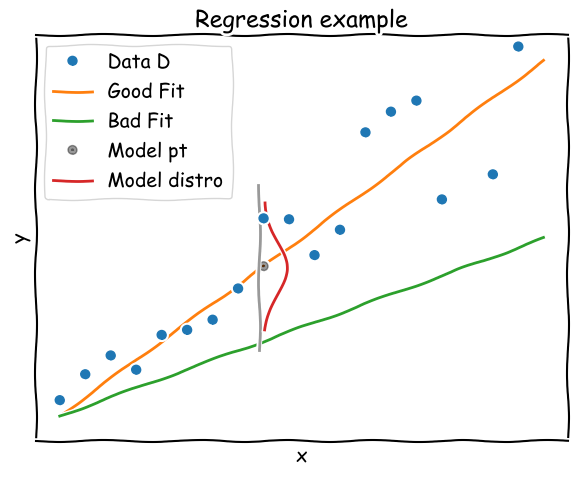

In [10]:
with plt.xkcd():

	fig, ax = plt.subplots(figsize=(6,5))

	ax.plot(x_ax,y, ls='none', marker = '.', label = 'Data D')
	# ax.plot(x_ax,lin(x_ax,0.7,0)*0.8, label = 'Fit')
	plt.legend()

	plt.xlabel('x')
	plt.ylabel('y')

	plt.ylim((-0.4, 6))

	plt.xticks([])
	plt.yticks([])
	plt.title('Regression example')
	plt.tight_layout()
	plt.savefig('Figures/Regression_unfitted_xkcd.svg')


	fig, ax = plt.subplots(figsize=(6,5))

	ax.plot(x_ax,y, ls='none', marker = '.', label = 'Data D', zorder = 10)
	ax.plot(x_ax,lin(x_ax,0.7,0)*0.8, label = 'Good Fit') #
	ax.plot(x_ax,lin(x_ax,0.7,0)*0.4, label = 'Bad Fit') #

	idx = 8
	fit = lin(x_ax,0.7,0)*0.8

	# ys = np.linspace(fit[idx]-1, fit[idx] +1 , 100)
	# ax.plot(x_ax[idx],fit[idx], ls='none', marker = '.', label = 'Model pt', c = 'black', alpha=0.4)
	# ax.axvline(x_ax[idx]-0.1, ys.min()/6, ys.max()/6*1.13 , color = 'black' , alpha=0.4)
	# ax.plot(x_ax[idx] + gauss(ys, fit[idx], 0.4)*0.5, ys ,label = 'Model distro' )


	plt.legend()

	plt.xlabel('x')
	plt.ylabel('y')

	plt.ylim((-0.4, 6))

	plt.xticks([])
	plt.yticks([])
	plt.title('Regression example')
	plt.tight_layout()
	plt.savefig('Figures/Regression_fitted_xkcd.svg')


	fig, ax = plt.subplots(figsize=(6,5))

	ax.plot(x_ax,y, ls='none', marker = '.', label = 'Data D', zorder = 10)
	ax.plot(x_ax,lin(x_ax,0.7,0)*0.8, label = 'Good Fit') #
	ax.plot(x_ax,lin(x_ax,0.7,0)*0.4, label = 'Bad Fit') #

	idx = 8
	fit = lin(x_ax,0.7,0)*0.8

	ys = np.linspace(fit[idx]-1, fit[idx] +1 , 100)
	ax.plot(x_ax[idx],fit[idx], ls='none', marker = '.', label = 'Model pt', c = 'black', alpha=0.4)
	ax.axvline(x_ax[idx]-0.1, ys.min()/6, ys.max()/6*1.13 , color = 'black' , alpha=0.4)
	ax.plot(x_ax[idx] + gauss(ys, fit[idx], 0.4)*0.5, ys ,label = 'Model distro' )

	# ax.spines[['top', 'right']].set_visible(False)

	plt.legend()

	plt.xlabel('x')
	plt.ylabel('y')

	plt.ylim((-0.4, 6))

	plt.xticks([])
	plt.yticks([])
	plt.title('Regression example')
	plt.tight_layout()
	plt.savefig('Figures/Regression_fitted_gauss_xkcd.svg')

plt.show();


findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

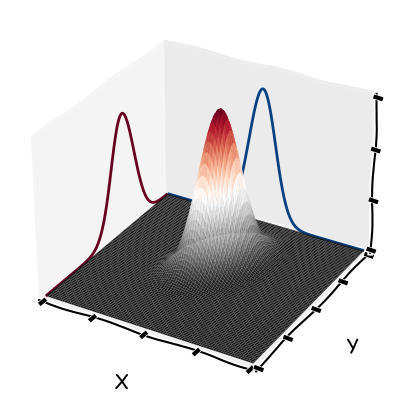

In [12]:
with plt.xkcd():


	ax = plt.figure(figsize=(6,5)).add_subplot(projection='3d')

	width = 10

	x = np.linspace(-width,width,700)
	y = np.linspace(-width,width,700)
	X, Y = np.meshgrid(x,y)

	mu_x= 0
	mu_y= 2
	variance_x = 2
	variance_y = 4

	pos = np.empty(X.shape + (2,))
	pos[:, :, 0] = X; pos[:, :, 1] = Y

	Z = multivariate_normal([mu_x, mu_y], [[variance_x, 1], [1, variance_y]]).pdf(pos)

	# Plot the 3D surface
	# ax.plot_surface(X, Y, Z, alpha=1, antialiased = 'False'), #e)  , edgecolor='royalblue' 'RdGy' , edgecolor='black' rstride=8, cstride=8, edgecolor='black', lw=0.2
	ax.plot_surface(X, Y, Z,  alpha=1, cmap = 'RdGy_r', rstride=8, cstride=8, antialiased = 'True'), #e)  , edgecolor='royalblue' 'RdGy' , edgecolor='black' , lw=0.2, rstride=8, cstride=8, antialiased = 'False'

	# Plot projections of the contours for each dimension.  By choosing offsets
	# that match the appropriate axes limits, the projected contours will sit on
	# the 'walls' of the graph.
	# ax.contour(X, Y, Z, zdir='z', offset=-100, cmap='coolwarm')
	ax.contour(X, Y, Z, zdir='x', offset=-width, levels = [1], cmap= 'PuRd_r') #, cmap='coolwarm'
	ax.contour(X, Y, Z, zdir='y', offset=width, levels = [1],cmap='GnBu_r') #cmap='coolwarm'

	ax.set(xlim=(-width, width), ylim=(-width, width),
		xlabel='X', ylabel='Y', zlabel='Z')

	ax.set_xlabel('X')
	ax.set_ylabel('Y')
	# ax.set_zlabel('Z')

	ax.xaxis.set_ticklabels([])
	ax.yaxis.set_ticklabels([])
	ax.zaxis.set_ticklabels([]);
	# plt.tight_layout()#
	# plt.show()

	plt.savefig('Figures/Marginal_Distro_xkcd.svg')

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.


findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 

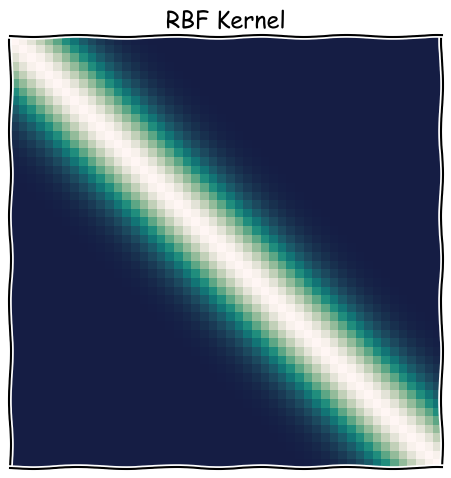

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

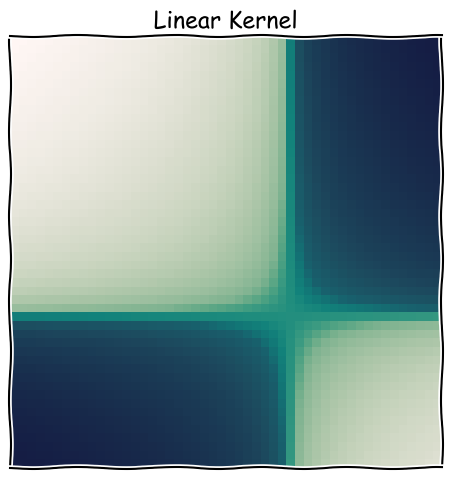

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

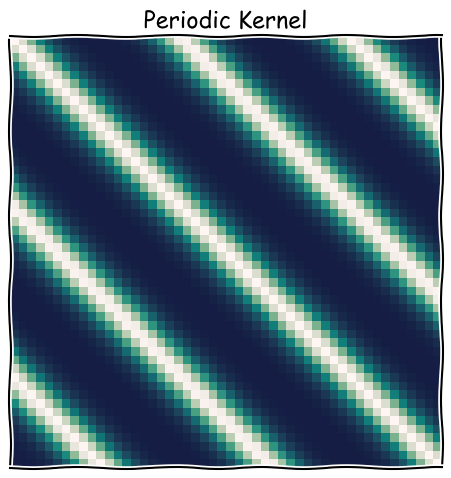

In [17]:
with plt.xkcd():

	fig, ax = plt.subplots(figsize=(6,5))


	x_axis = np.linspace(-10,10,50)

	# ---------------------------------------- RBF Kernel ---------------------------------------- #

	init_params = [1,2] # ~ simga | length/ width

	ax.imshow(RBF_kernel(x_axis,x_axis,init_params), cmap=pal_cmap)
	ax.set_title('RBF kernel cov. matrix')


	plt.xticks([])
	plt.yticks([])
	plt.title('RBF Kernel')
	plt.tight_layout()
	plt.savefig('Figures/Kernel_RBF_xkcd.svg')
	plt.show()

	# ---------------------------------------- Linear Kernel ---------------------------------------- #
	fig, ax = plt.subplots(figsize=(6,5))

	init_params_lin = [0,1,3]#  avg distance from offset | sigma | offset [1,0.5,3]#
	cov_3 = linear_kernel(x_axis,x_axis,init_params_lin)
	# print(cov_3)

	ax.imshow(linear_kernel(x_axis,x_axis,init_params_lin), cmap=pal_cmap, norm='symlog')
	ax.set_title('Linear kernel cov. matrix')

	plt.xticks([])
	plt.yticks([])
	plt.title('Linear Kernel')
	plt.tight_layout()
	plt.savefig('Figures/Kernel_Lin_xkcd.svg')
	plt.show()


	# -------------------------------------- Periodic Kernel ---------------------------------------- #
	fig, ax = plt.subplots(figsize=(6,5))

	init_params_per = [1,8,0.7] #  ~ 1sigma | period | lenghtscale
	cov_3 = linear_kernel(x_axis,x_axis,init_params_per)

	ax.imshow(periodic_kernel(x_axis,x_axis,init_params_per), cmap=pal_cmap)
	ax.set_title('Periodic kernel cov. matrix')


	plt.xticks([])
	plt.yticks([])
	plt.title('Periodic Kernel')
	plt.tight_layout()
	plt.savefig('Figures/Kernel_Per_xkcd.svg')
	plt.show()